<a href="https://colab.research.google.com/github/BHUVANAN8/Projects/blob/main/bikeobject_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install bing-image-downloader

In [3]:
!mkdir bikimages

In [5]:
from bing_image_downloader import downloader
downloader.download("motorbikeimages", limit= 150, output_dir = 'bikimages')

[%] Downloading Images to /content/bikimages/motorbikeimages


[!!]Indexing page: 1

[%] Indexed 151 Images on Page 1.


[%] Downloading Image #1 from http://images.mcn.bauercdn.com/pagefiles/641270/triumph-bobber-black-01.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/originals/cc/d5/ed/ccd5ed7869ff14b602b3669aad3eead5.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/48/7d/8d/487d8d5fcf81fc46c19b2625a6a15346.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/736x/83/ca/1e/83ca1e3c24650232f03cb322cd2632d2--shimano-mountain-bike.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.totalmotorcycle.com/motorcycles/2012models/2012-Suzuki-BoulevardM109Rb.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/originals/ee/8e/92/ee8e9241d72a76f9e72ddff6849728d1.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://nsbikes.com/2014/images/slider/s7-

In [6]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/images/bikeimages'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/images/bikeimages/Image_21.jpg
/content/images/bikeimages/Image_112.jpg
/content/images/bikeimages/Image_5.png
/content/images/bikeimages/Image_57.jpg
/content/images/bikeimages/Image_141.jpg
/content/images/bikeimages/Image_54.jpg
/content/images/bikeimages/Image_128.jpg
/content/images/bikeimages/Image_7.png
/content/images/bikeimages/Image_96.jpg
/content/images/bikeimages/Image_93.jpg
/content/images/bikeimages/Image_88.jpg
/content/images/bikeimages/Image_117.jpg
/content/images/bikeimages/Image_9.jpg
/content/images/bikeimages/Image_23.png
/content/images/bikeimages/Image_12.jpg
/content/images/bikeimages/Image_86.png
/content/images/bikeimages/Image_42.png
/content/images/bikeimages/Image_102.jpg
/content/images/bikeimages/Image_113.jpg
/content/images/bikeimages/Image_78.jpg
/content/images/bikeimages/Image_75.jpg
/content/images/bikeimages/Image_16.jpg
/content/images/bikeimages/Image_2.jpg
/content/images/bikeimages/Image_65.jpg
/content/images/bikeimages/Image_48.jp

In [7]:
import cv2
import matplotlib.pyplot as plt

In [21]:
!git clone https://github.com/pjreddie/darknet
!cd darknet
!make
!wget https://pjreddie.com/media/files/yolov3.weights

fatal: destination path 'darknet' already exists and is not an empty directory.
make: *** No targets specified and no makefile found.  Stop.
--2021-07-09 07:58:35--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  44.6MB/s    in 5.7s    

2021-07-09 07:58:41 (41.5 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]



In [10]:
net = cv2.dnn.readNet("./yolov3.weights", "./darknet/cfg/yolov3.cfg")

In [11]:
classes = []
with open("./darknet/data/coco.names","r") as f:
    classes = [line.strip() for line in f.readlines()]

In [12]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [19]:
def predict_img(path):
    img = cv2.imread(path)
    height, width, channels = img.shape
    blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416),
         swapRB=True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                    # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                    # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    colors = np.random.uniform(0, 255, size=(len(classes), 3))
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y -5),cv2.FONT_HERSHEY_SIMPLEX,1/2, color, 2)
    plt.imshow(img)

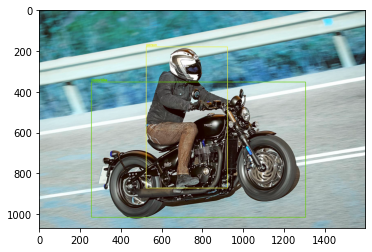

In [20]:
predict_img("/content/bikimages/motorbikeimages/Image_1.jpg")
